In [75]:
import tensorflow as tf
from uzapy.tools import ImageDataset
from uzapy.architecture.dnn import DNN
from uzapy.nlp import one_hot_encoding
import numpy as np

In [76]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [77]:
max     = x_train.max()
x_train = x_train / max
x_test  = x_test / max
train_ds = ImageDataset(x_train, y_train)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

y_train = one_hot_encoding(10, y_train)
y_test = one_hot_encoding(10, y_test)

In [78]:
def build_model(input_size):
  model = DNN(input_size)
  model.add(10, activation='sigmoid')
  model.add(10, activation='sigmoid')
  model.add(10, activation='softmax')
  
  model.compile('categorical_crossentropy', 'sgd', ['accuracy'])

  return model

In [79]:
model = build_model(x_train.shape[1])
model.train((x_train.T, y_train.T), (x_test.T, y_test.T), lr=0.1, batch_size=514, shuffle=False, epoch=20, verbose=False)
model.performance()

100%|██████████| 20/20 [02:20<00:00,  7.02s/it]

train accuracy:  0.84312
test  accuracy :  0.846


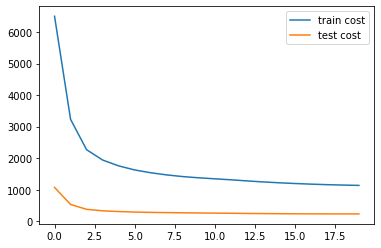

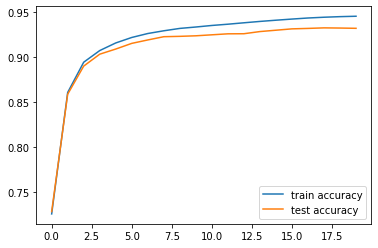

In [72]:
model.plot_history('cost', lloc='up')
model.plot_history('accuracy', lloc='down')


3


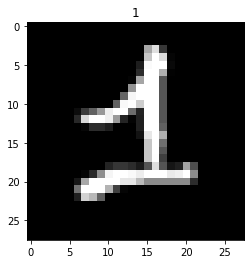

7


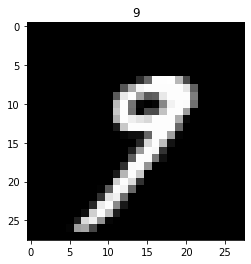

5


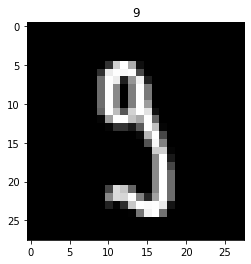

2


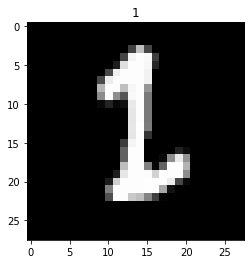

0


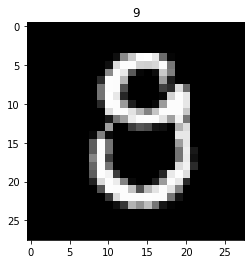

3


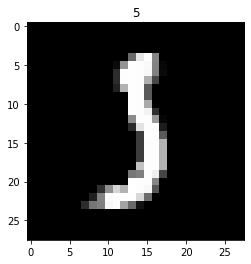

8


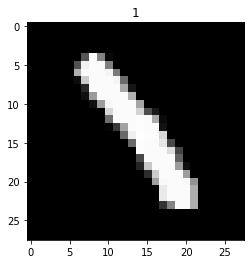

9


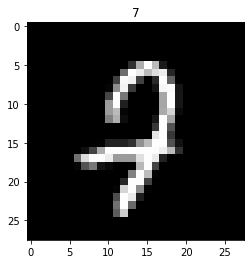

6


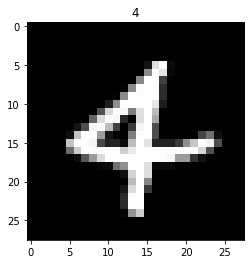

7


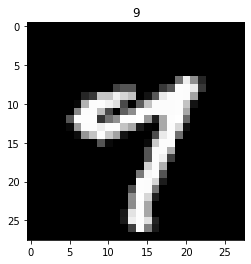

2


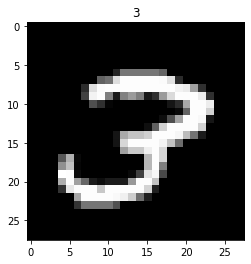

9


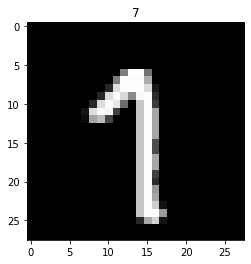

7


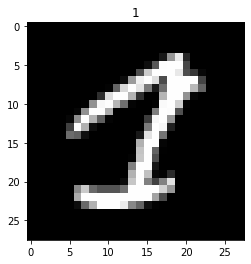

5


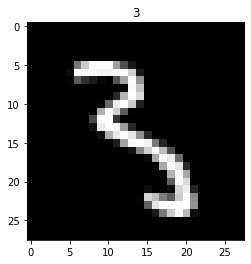

8


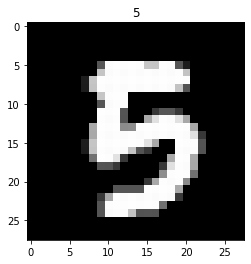

5


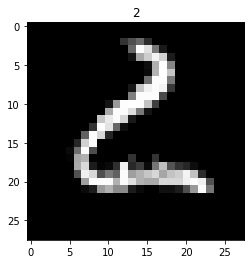

4


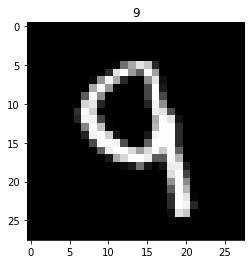

7


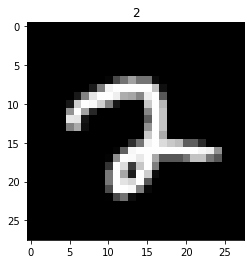

3


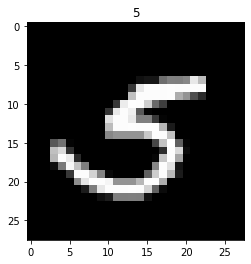

2


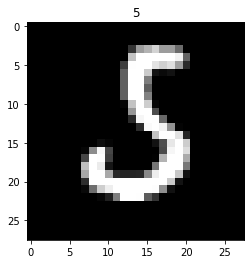

9


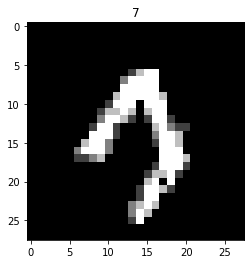

4


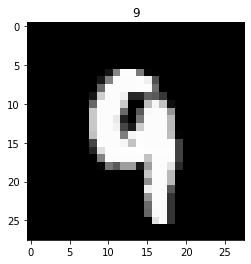

9


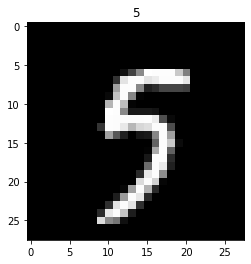

1


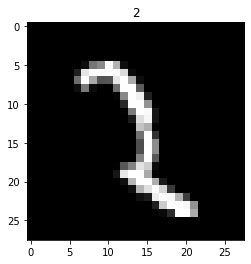

3


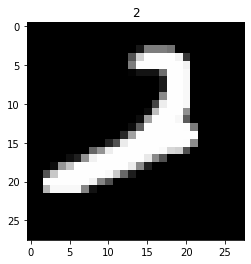

5


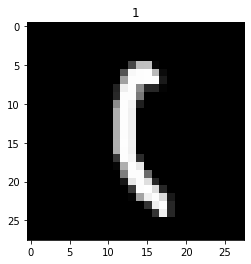

8


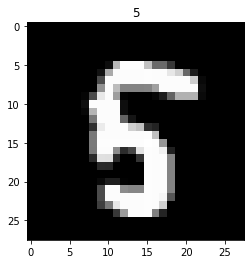

0


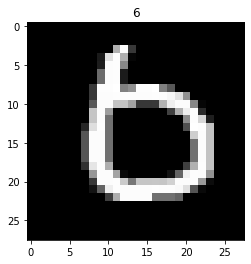

7


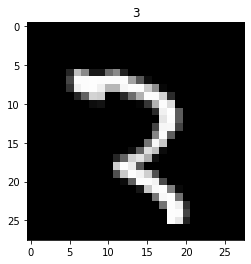

5


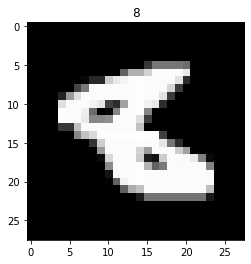

7


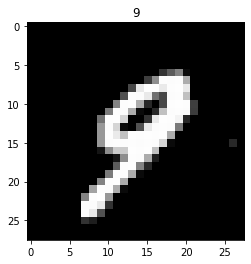

3


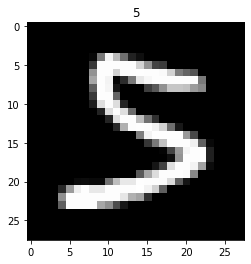

8


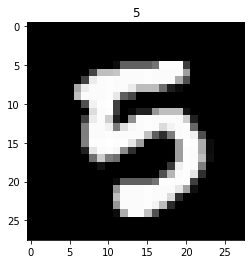

5


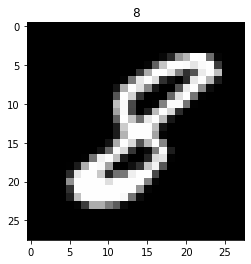

5


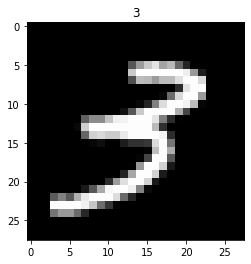

5


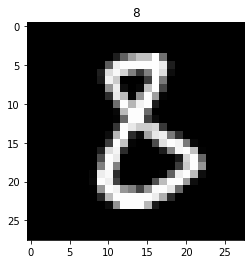

9


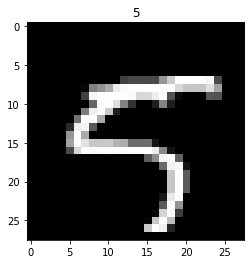

9


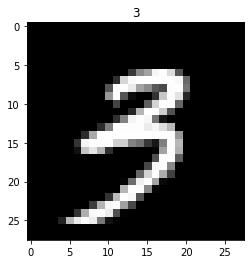

7


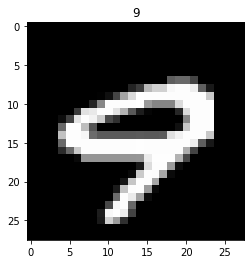

2


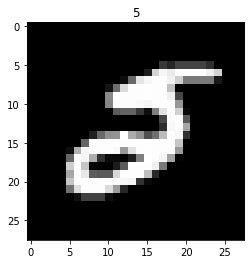

2


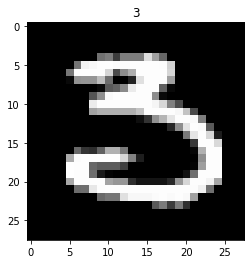

3


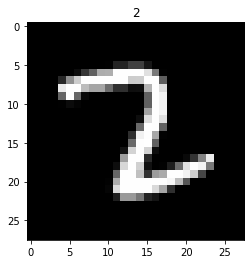

6


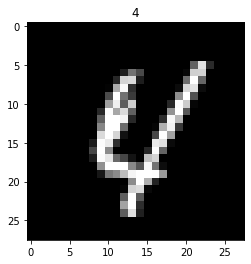

7


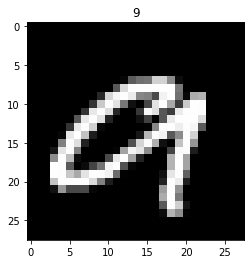

5


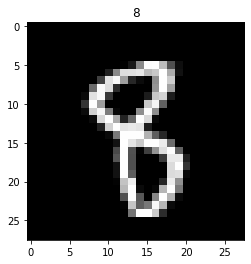

5


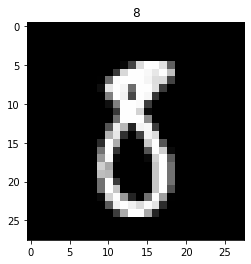

5


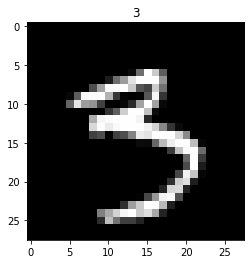

0


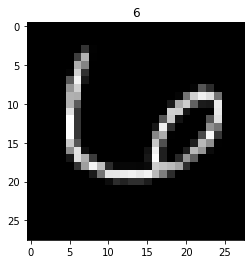

4


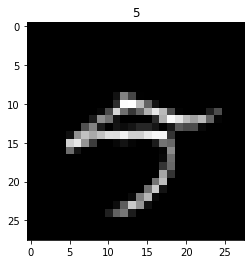

3


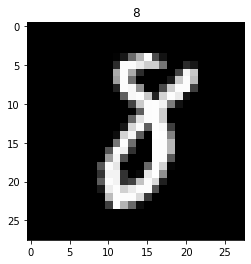

0


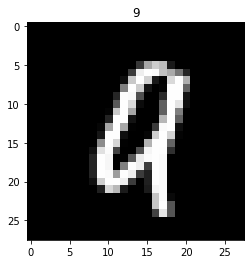

6


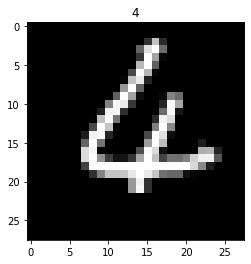

7


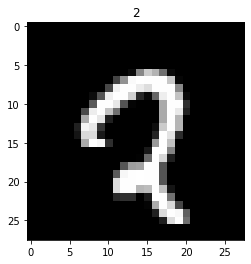

3


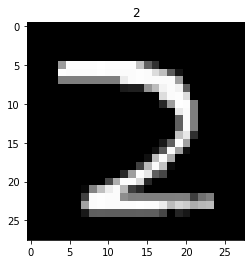

1


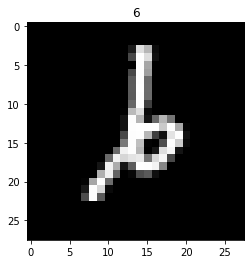

6


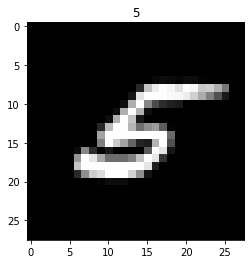

0


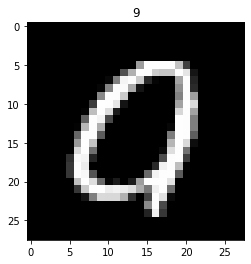

0


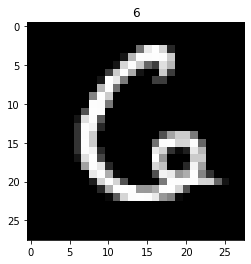

6


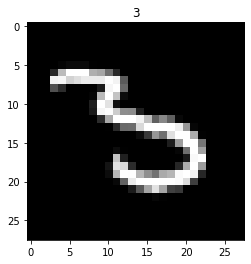

4


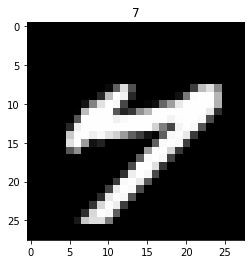

6


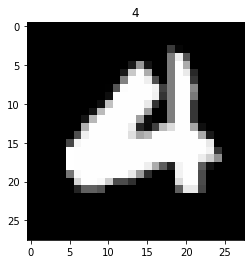

7


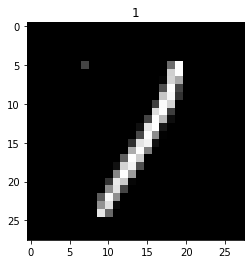

8


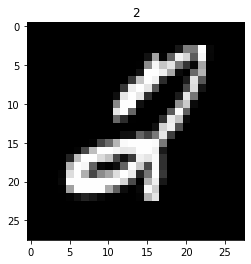

7


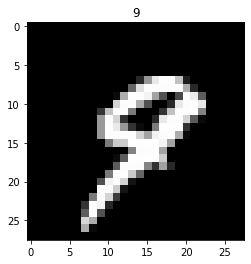

4


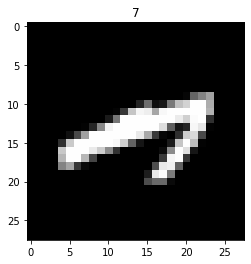

5


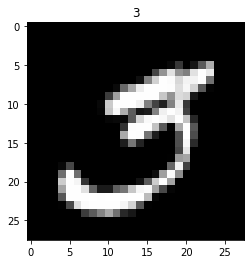

1


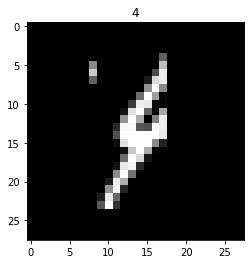

7


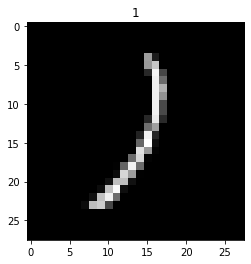

6


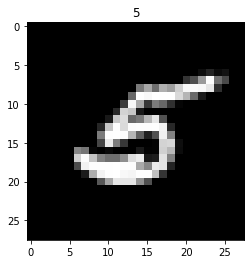

2


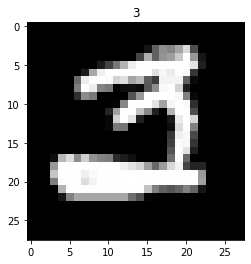

6


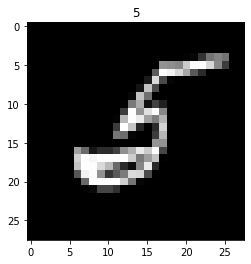

1


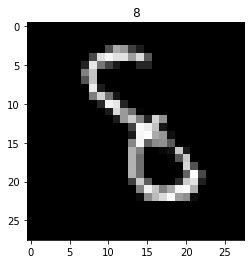

5


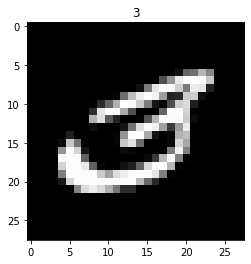

6


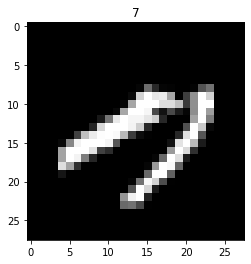

3


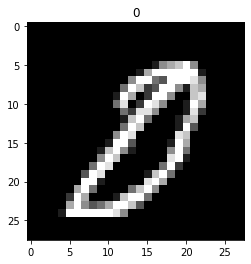

7


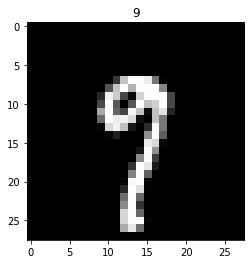

6


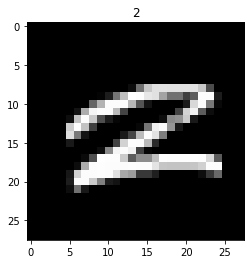

8


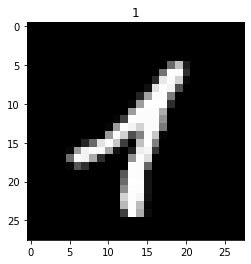

4


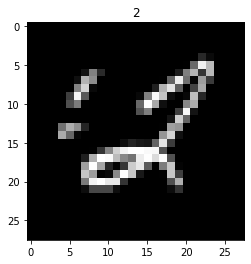

2


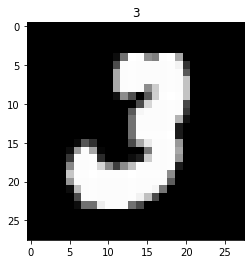

2


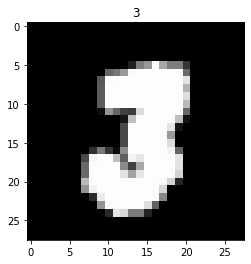

3


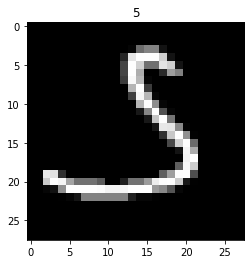

2


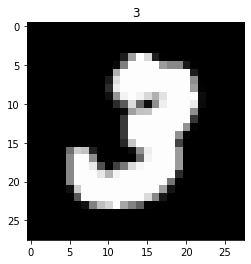

5


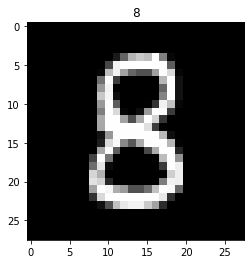

7


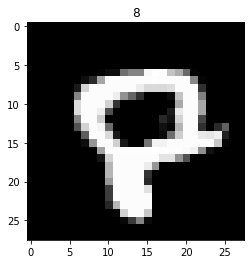

2


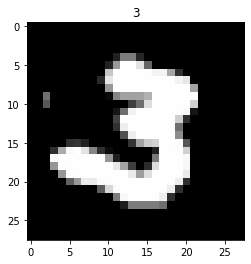

8


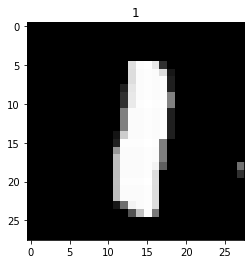

9


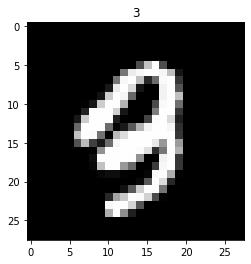

8


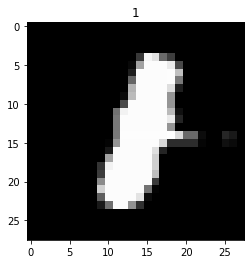

1


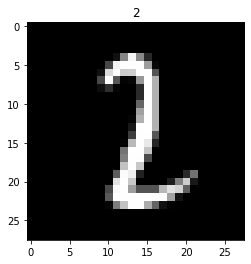

5


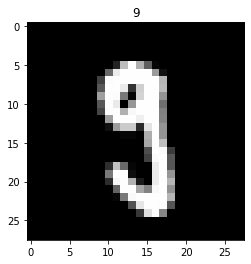

8


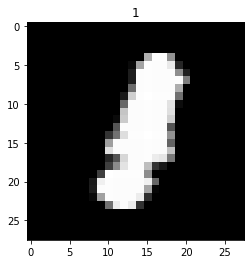

8


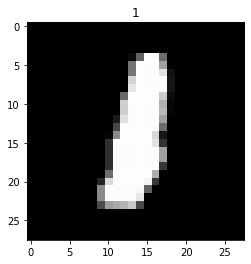

2


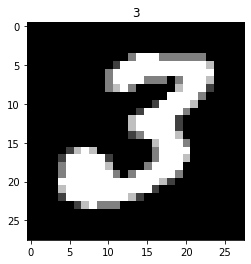

8


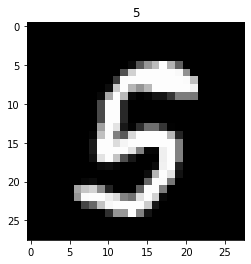

2


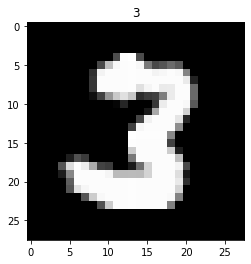

0


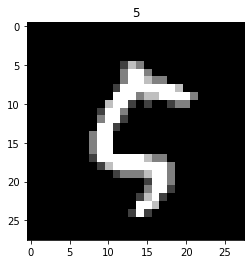

2


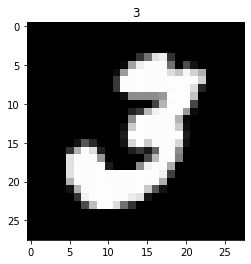

5


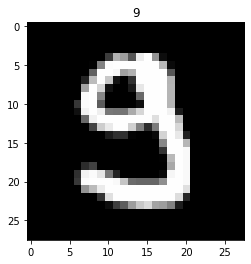

2


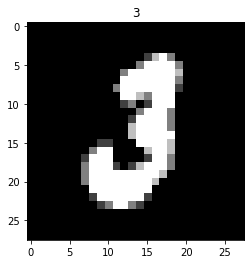

4


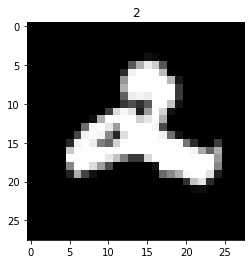

8


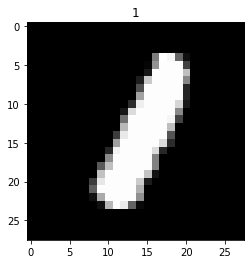

8


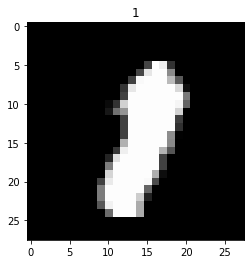

9


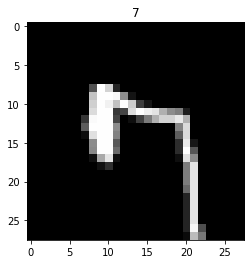

5


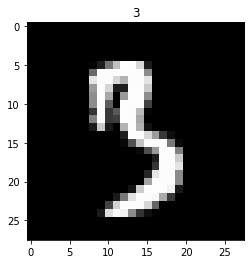

8


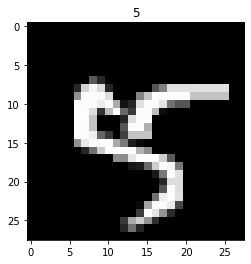

6


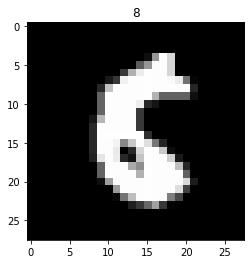

8


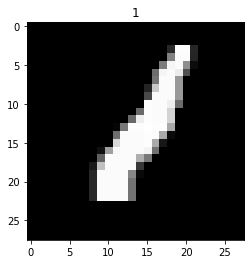

6


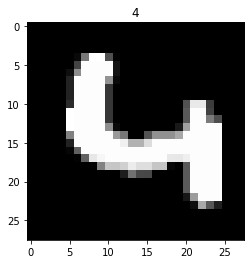

5


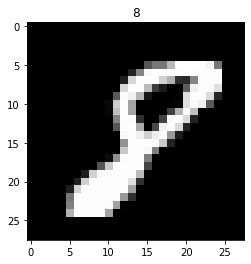

8


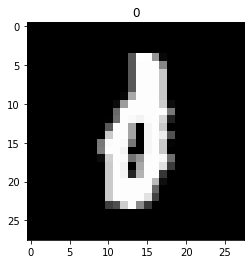

7


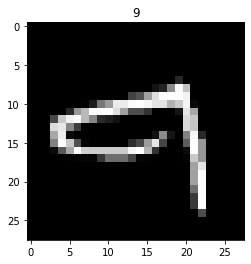

8


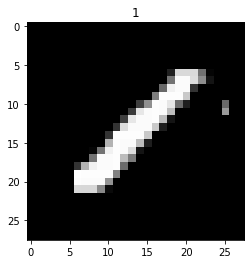

9


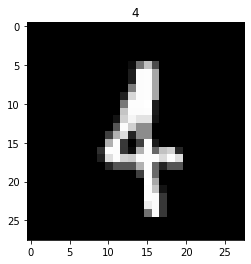

5


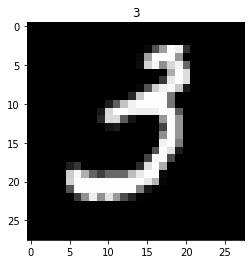

8


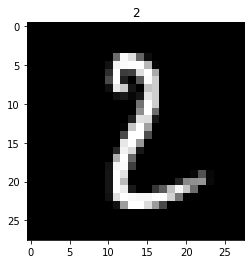

7


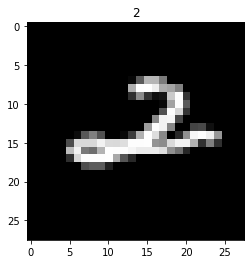

9


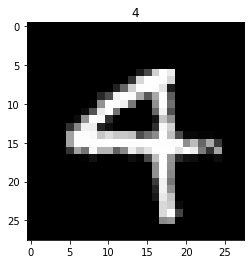

2


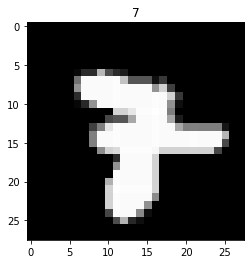

3


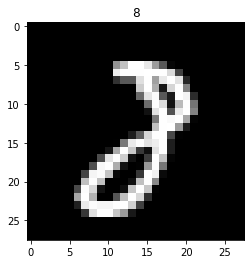

9


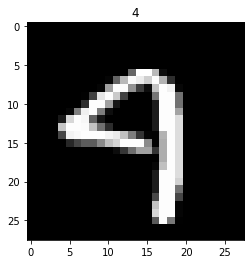

3


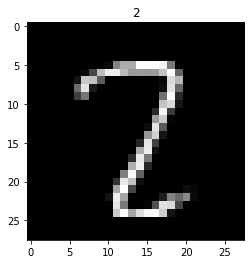

5


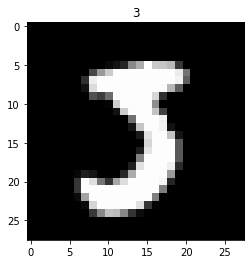

5


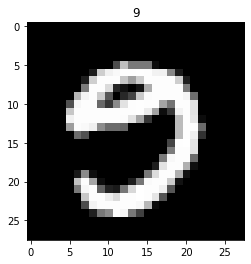

5


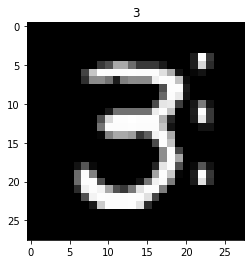

3


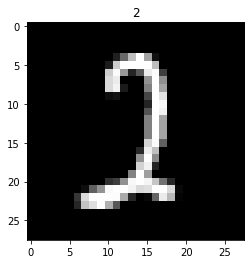

6


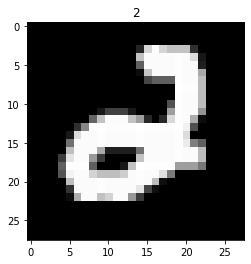

1


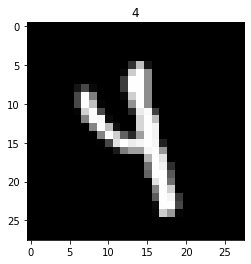

3


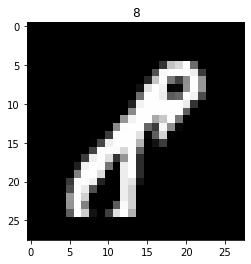

9


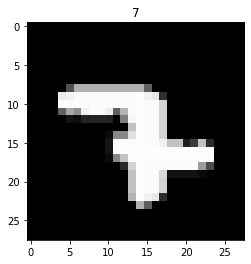

4


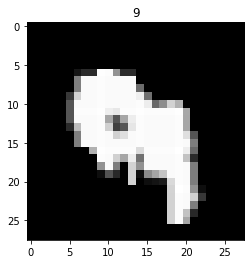

0


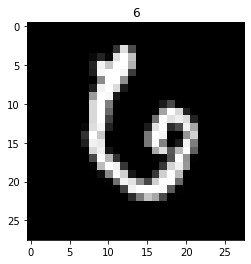

5


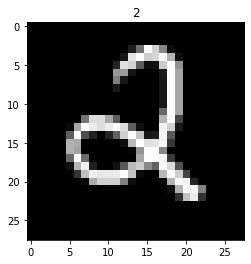

8


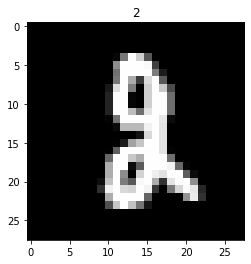

4


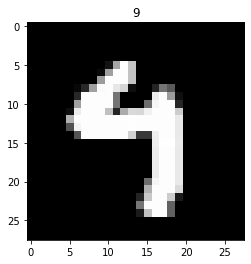

4


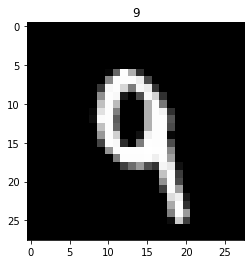

7


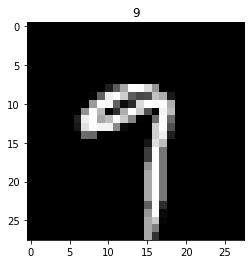

5


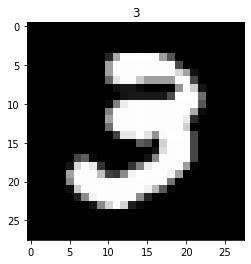

8


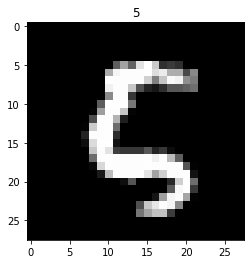

5


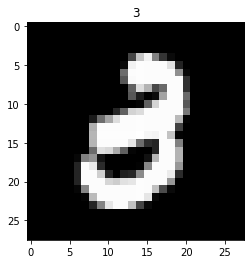

1


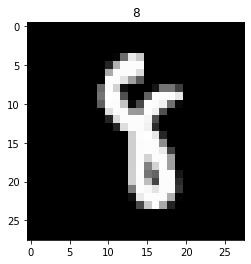

2


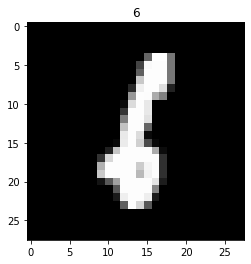

2


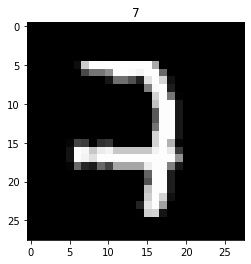

0


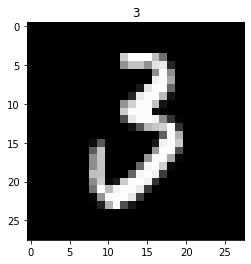

5


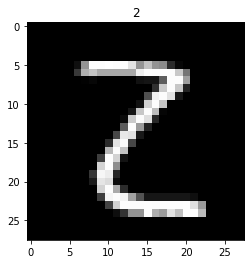

5


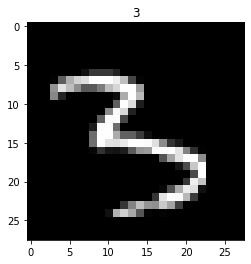

9


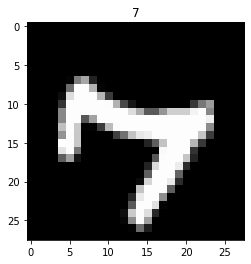

3


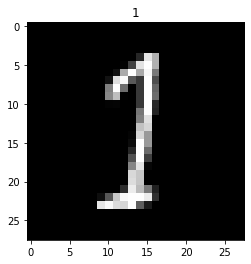

0


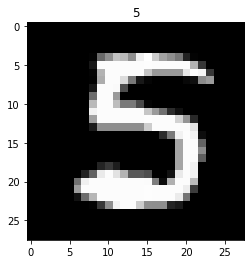

6


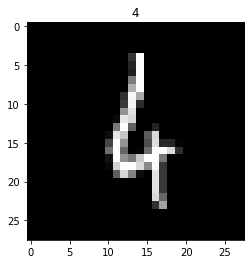

0


KeyboardInterrupt: 

In [69]:
for idx in range(x_train.shape[0]):
  x = x_train[idx].reshape(-1, 1)
  y_true = np.argmax(y_train[idx])
  y_pred = np.argmax(model.predict(x))

  if y_true != y_pred:
    print(y_pred)
    train_ds.show(idx)